#  **Problem** : predict the total ride duration of the taxi trips in New York City


 **Hypothesis**: weekends tend to have lesser trip duration due to less congestion

# Importing Libraries

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
from datetime import datetime

df=pd.read_csv('/content/nyc_taxi_trip_duration.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447


# exploring dataset

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [7]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

**Here’s what we know about the columns:**

**id** : a unique identifier for each trip

**vendor_id** : a code indicating the provider associated with the trip record

**pickup_datetime**: date and time when the meter was engaged

**dropoff_datetime**:  date and time when the meter was disengaged

**passenger_count** : the number of passengers in the vehicle (driver entered value)

**pickup_longitude** : the longitude when the meter was engaged

**pickup_latitude** : the latitude when the meter was engaged

**dropoff_longitude** : the longitude where the meter was disengaged

**dropoff_latitude** : the latitude where the meter was disengaged

**store_and_fwd_flag** : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

**trip_duration(target)**:duration of the trip in seconds

 We get a partial view of the data set by looking at the first 5 rows returned by df.head().

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [9]:
df.shape

(729322, 11)

In [10]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [20]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

The number of N flag is much larger

# processing dataset

In [11]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
#df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

#extract day,hour, time of the day,week and month
df['pickup_day']=df['pickup_datetime'].dt.day
df['dayOfWeek'] = df['pickup_datetime'].dt.day_name()

df['pickup_week']=df['pickup_datetime'].dt.week



df['pickup_time']=df['pickup_datetime'].dt.time
df['pickup_hour']=df['pickup_datetime'].dt.hour

df['pickup_time_of_day']=pd.cut(df['pickup_hour'],bins=[00,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
df['pickup_month']=df['pickup_datetime'].dt.month_name()



#pickup_date=[df['pickup_day'],df['pickup_hour'],df['pickup_time_of_day'],df['pickup_month']]
df



<ipython-input-11-bb10d7ed9085>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['pickup_week']=df['pickup_datetime'].dt.week


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dayOfWeek,pickup_week,pickup_time,pickup_hour,pickup_time_of_day,pickup_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,29,Monday,9,16:40:21,16,Afternoon,February
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,11,Friday,10,23:35:37,23,Evening,March
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,21,Sunday,7,17:59:33,17,Afternoon,February
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,Tuesday,1,09:44:31,9,Morning,January
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,17,Wednesday,7,06:42:23,6,Night,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,21,Saturday,20,13:29:38,13,Afternoon,May
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,22,Monday,8,00:43:11,0,NaN,February
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,15,Friday,15,18:56:48,18,Afternoon,April
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,19,Sunday,24,09:50:47,9,Morning,June


In [12]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day,pickup_week,pickup_hour
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,15.502088,13.843884,13.611698
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,8.699772,8.558386,6.402853
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,1.000000,1.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,8.000000,7.000000,9.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,15.000000,13.000000,14.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,23.000000,20.000000,19.000000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,31.000000,53.000000,23.000000




**Some observations about the data:**

The columns pickup_datetime and dropoff_datetime were stored as object which I converted to datetime for better analysis.

The column store_and_fwd_flag is stored as object which is equivalent to catagory

The df.describe function is used to calculate the summary statistics of numerical culumns

The df.info() function prints information about the DataFrame.

the df.shape returns the number of rows and columns,thus have a data set with 117489 rows and 11 columns

The pickup_time_of_day is represented by hours,minutes and seconds which is difficult for the analysis,so we divide the times into 4 time slot: morning (6 hrs to 112 hrs) , Aternoon (12 hrs to 18 hrs) , evening (18 hrs to 24 hrs) and late night (00 hrs to 6 hrs)


# univariate analysis

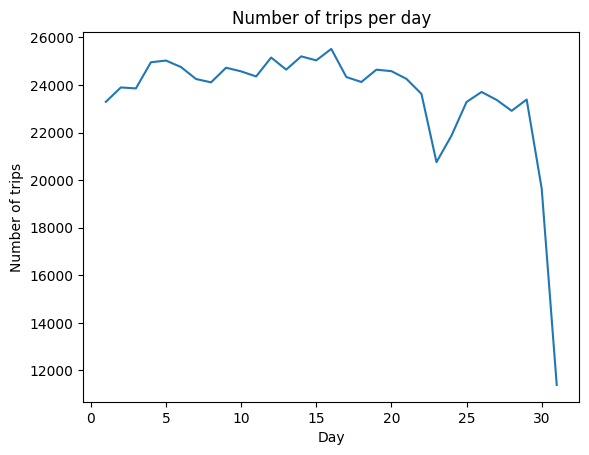

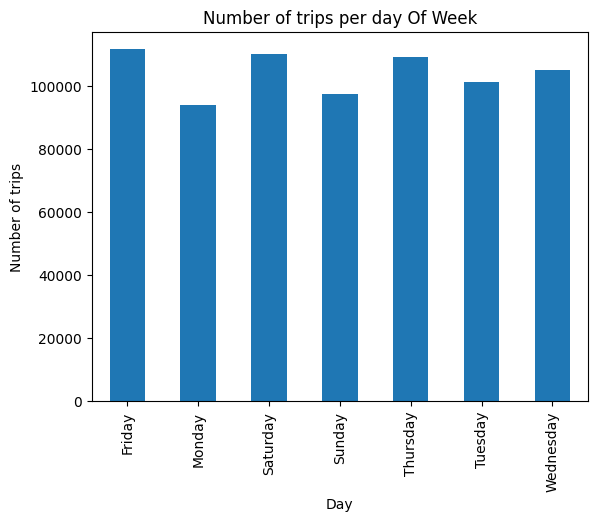

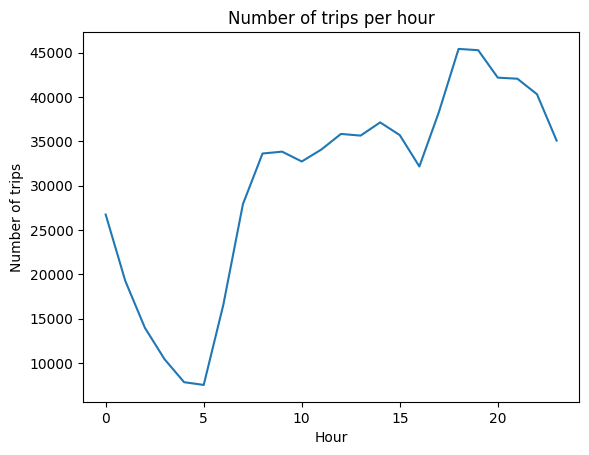

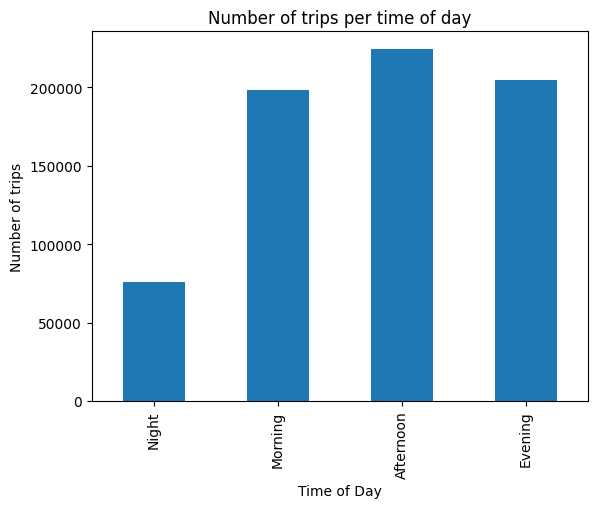

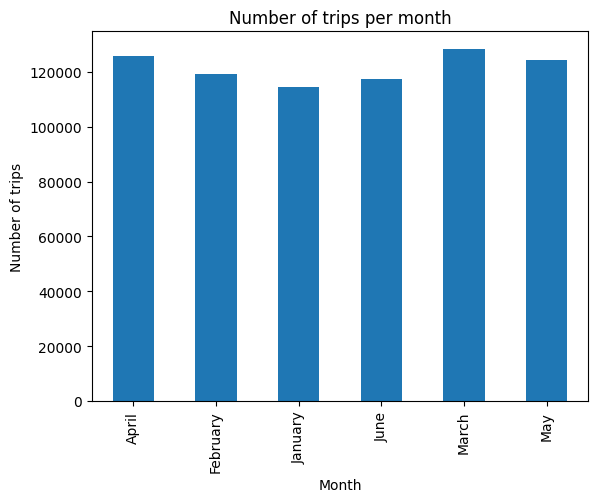

In [13]:

#univariate analysis
trip_per_day= df.groupby(df['pickup_day']).size()
#plt.subplot(1,2,1)

trip_per_day.plot(kind='line')
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.title('Number of trips per day')
plt.show()

df['pickup_day'].value_counts()

trip_per_day= df.groupby(df['dayOfWeek']).size()
#plt.subplot(1,2,1)
trip_per_day.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.title('Number of trips per day Of Week')
plt.show()

trip_per_hour=df.groupby(df['pickup_hour'])['id'].nunique()
#plt.subplot(2,2,2)
trip_per_hour.plot(kind='line')
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.title('Number of trips per hour')
plt.show()

trip_per_time_of_day=df.groupby(df['pickup_time_of_day'])['id'].nunique()
#plt.subplot(3,2,3)
trip_per_time_of_day.plot(kind='bar')
plt.xlabel('Time of Day')
plt.ylabel('Number of trips')
plt.title('Number of trips per time of day')
plt.show()

trip_per_month=df.groupby(df['pickup_month'])['id'].nunique()
#plt.subplot(2,2,4)
trip_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of trips')
plt.title('Number of trips per month')
plt.show()





I decided to focus on the pickup_datetime only, because I believe I would get similar output when dropoff_datetime was used.

we see on the second plot, most trips were taken on Friday, thursday and saturday. Monday being the least.

we observe in plot 4, most pickups occur in the Afternoon. While the least pickups occur during morning.

March has the most number of trips, followed by April. while January has the least number of trips

#Bivariate analysis

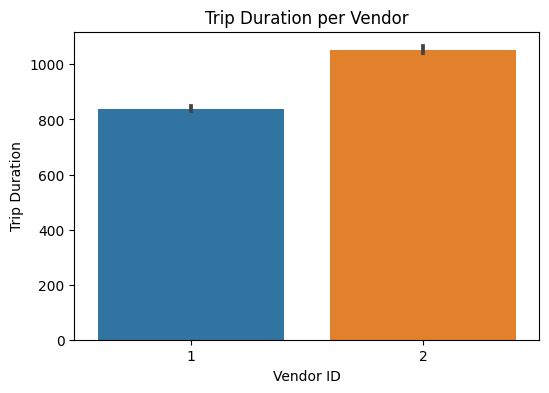

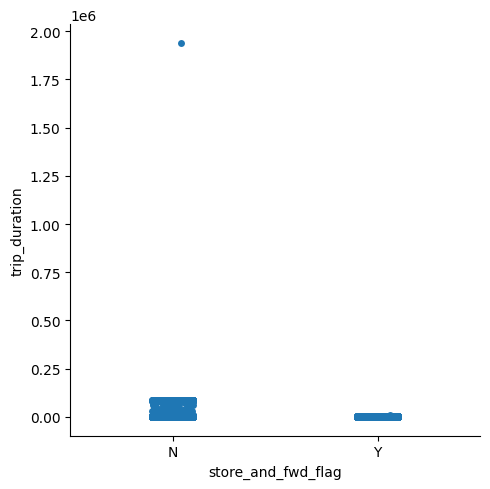

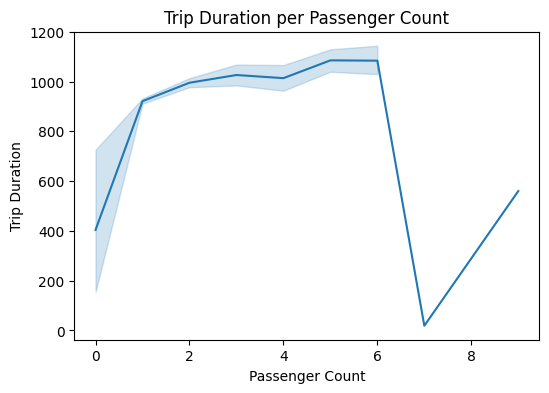

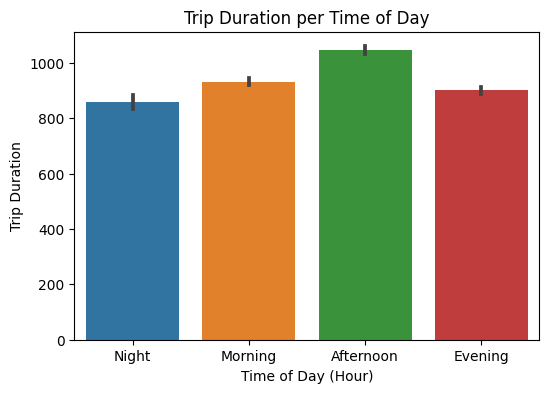

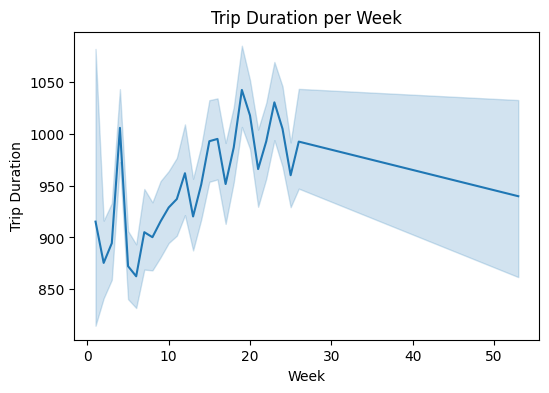

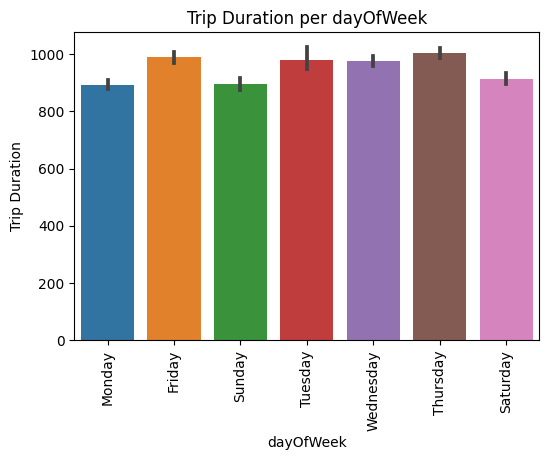

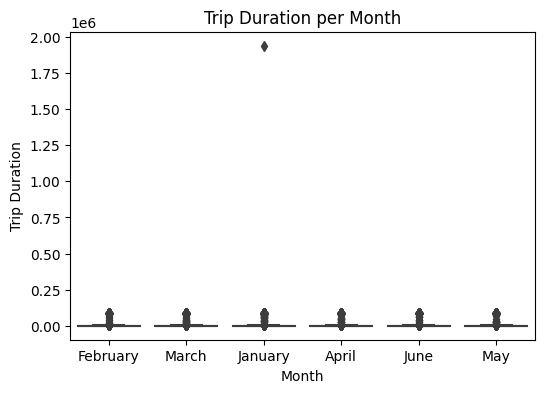

[Text(0.5, 1.0, 'Bar plot of a Trip Duration per Month')]

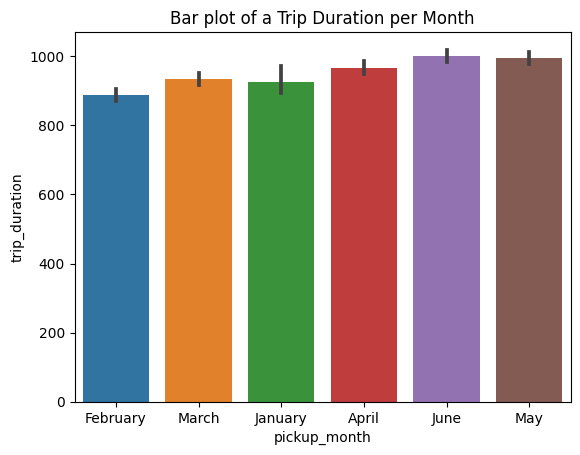

In [24]:
#Bivariate analysis
#Trip duration and other columns

# Trip duration per vendor
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='vendor_id', y='trip_duration')
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per Vendor')
plt.show()

sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=df)

# Trip duration per passenger count
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='passenger_count', y='trip_duration')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per Passenger Count')
plt.show()

# Trip duration per time of day
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='pickup_time_of_day', y='trip_duration')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per Time of Day')
plt.show()

# Trip duration per week
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='pickup_week', y='trip_duration')
plt.xlabel('Week')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per Week')
plt.show()

# Trip duration per dayOfweek
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='dayOfWeek', y='trip_duration')
plt.xlabel('dayOfWeek')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per dayOfWeek')
plt.xticks(rotation=90)
plt.show()

# Trip duration per month
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='pickup_month', y='trip_duration',)
plt.xlabel('Month')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per Month')
plt.show()

sns.barplot(df, x="pickup_month", y="trip_duration").set(title='Bar plot of a Trip Duration per Month')

**Conclusion about Trip Duration and the dataset**:

Vendor 2 mostly provides the longer trips

We counted the number of flags above and the number of N flags was lager, we can also see the relationship with the duration trip here.The flag was stored only for short duration trips

Afternoons provides longer trips, I guess it is due to traffic since we had more pickups around those times

The highest duration of a trip is most on Thursday and Friday as number of trips are mostly taken in these days

Sartuday and Sunday have lesser trip duration.




# the code below calculates the distance


In [26]:
# #Bivariate analysis
#Distance and other columns

# creating a Distance formula from the given latitudes and longitudes
def distance_trip(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
# Convert degrees to radians
  lat1_rad = math.radians(pickup_latitude)
  lon1_rad = math.radians(pickup_longitude)
  lat2_rad = math.radians(dropoff_latitude)
  lon2_rad = math.radians(dropoff_longitude)

# Radius of the Earth in kilometers
  earth_radius = 6371

# Haversine formula
  dlon = lon2_rad - lon1_rad
  dlat = lat2_rad - lat1_rad
  a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
  distance = earth_radius * c #radius of earth in kilometers

  return distance

pickup_longitude = df['pickup_latitude']
pickup_latitude = df['pickup_longitude']
dropoff_longitude =df['pickup_longitude']
dropoff_latitude = df['dropoff_longitude']


df['distance']=df.apply(lambda x:distance_trip (x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']),axis=1)
print("Distance:",df['distance'], "km")


Distance: 0         1.199073
1         4.129111
2         7.250753
3         2.361097
4         4.328534
            ...   
729317    1.120223
729318    0.728705
729319    2.298776
729320    0.846316
729321    5.945837
Name: distance, Length: 729322, dtype: float64 km


here I used a harvesine distance formular from Math to calculate distance from given latitudes and longitudes.

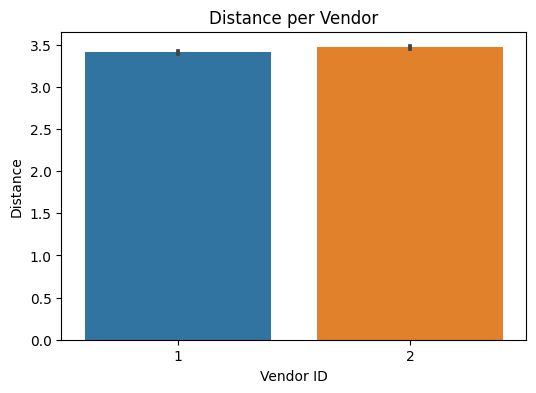

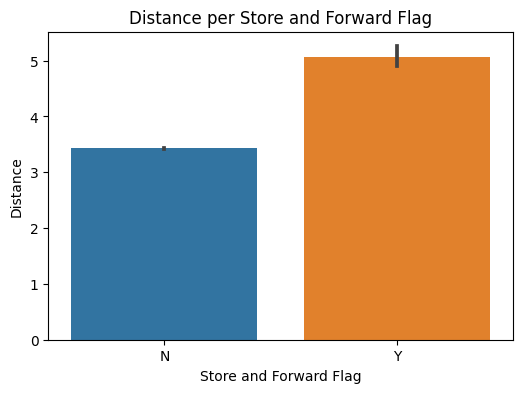

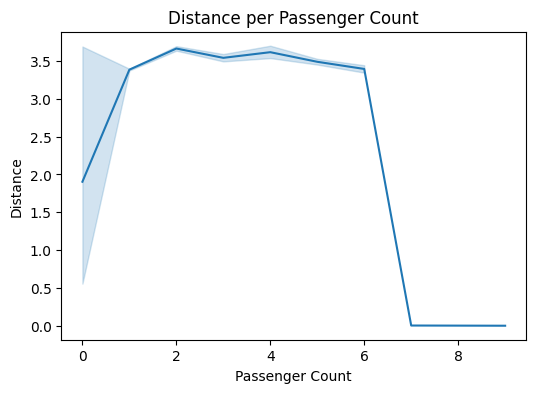

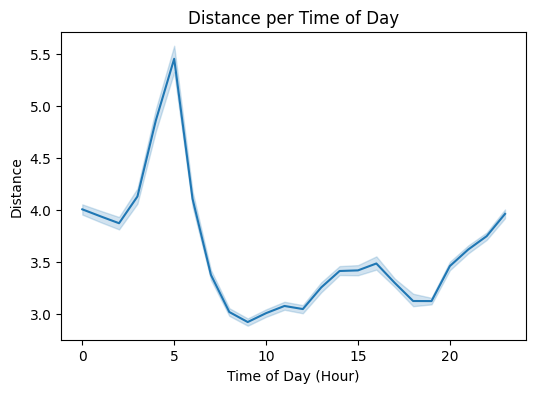

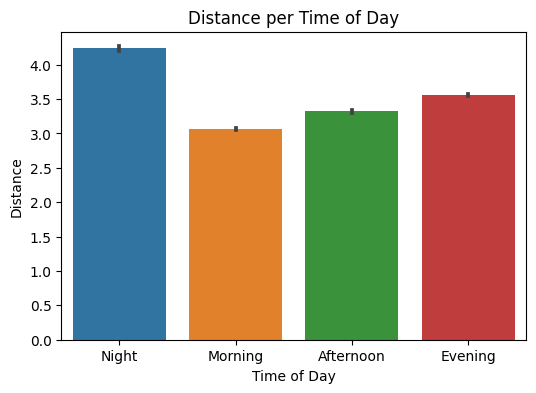

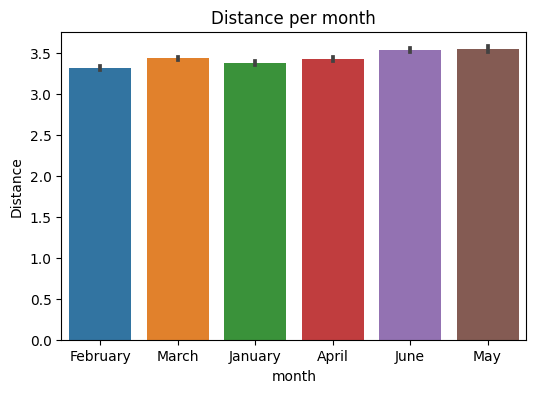

In [19]:
# Distance and Vendor ID
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='vendor_id', y='distance')
plt.xlabel('Vendor ID')
plt.ylabel('Distance')
plt.title('Distance per Vendor')
plt.show()

# Distance and Store and Forward Flag
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='store_and_fwd_flag', y='distance')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Distance')
plt.title('Distance per Store and Forward Flag')
plt.show()

# Distance per passenger count
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='passenger_count', y='distance')
plt.xlabel('Passenger Count')
plt.ylabel('Distance')
plt.title('Distance per Passenger Count')
plt.show()

# Distance per hour of the day
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='pickup_hour', y='distance')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Distance')
plt.title('Distance per Time of Day')
plt.show()

# Distance per time of day
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='pickup_time_of_day', y='distance')
plt.xlabel('Time of Day')
plt.ylabel('Distance')
plt.title('Distance per Time of Day')
plt.show()

# Distance per month
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='pickup_month', y='distance')
plt.xlabel('month')
plt.ylabel('Distance')
plt.title('Distance per month')
plt.show()


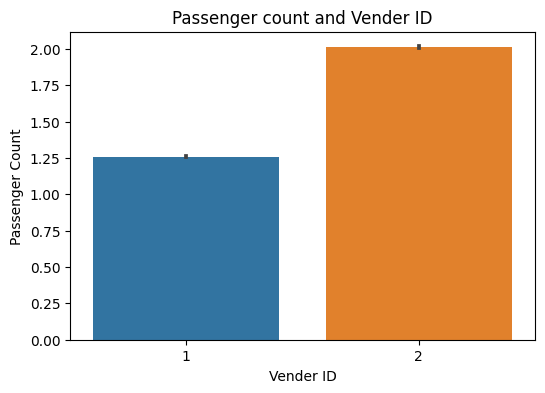

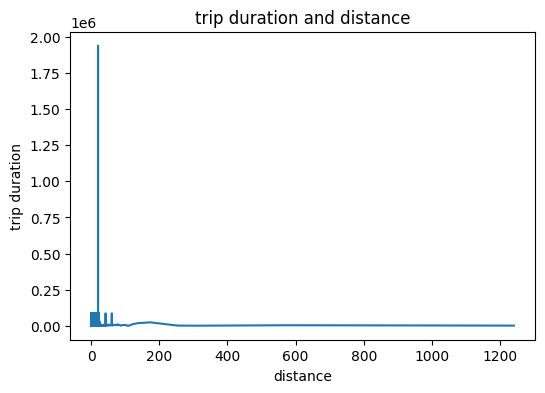

In [17]:
# vender id and passenger count
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='vendor_id', y='passenger_count')
plt.xlabel('Vender ID')
plt.ylabel('Passenger Count')
plt.title('Passenger count and Vender ID')
plt.show()



# trip duration and distance
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='distance', y='trip_duration')
plt.xlabel('distance')
plt.ylabel('trip duration')
plt.title('trip duration and distance')
plt.show()

**Conclusion about Distance and the dataset**:

the number of passengers who take long distance trips are mostly 6

distance per vender is almost the same for vender 1 and 2.

We can see that the night slot have most long distance trips


#Conclusion:
According to the univariate and bivariate analysis,weekends tend to have lesser trip duration.